# Imports

In [2]:
# General:
import tweepy
import pandas as pd
import numpy as np

# For plotting and visualisation
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create Twitter app and save credentials in credentials.py e.g.

```python
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = ''
CONSUMER_SECRET = ''

# Access:
ACCESS_TOKEN  = ''
ACCESS_SECRET = ''
```

In [3]:
# Import access keys
from credentials import *

# Tweet Extraction

In [4]:
# API's setup
def twitter_setup():
    """
    Utility function to setup the Twitter API
    with our access keys provided
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
    
    # Return API with authentication
    return tweepy.API(auth)

In [8]:
# Extract Twitter data
extractor = twitter_setup()

# Create a tweet list:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# Print the last 5 tweets
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print

Number of tweets extracted: 200.

5 recent tweets:

GDP was revised upward to 3.1 for last quarter. Many people thought it would be years before that happened. We have just begun!
RT @GOPChairwoman: The Trump Inaugural Committee is donating $3 million in surplus funds to victims of the latest hurricanes. 
https://t.co…
Puerto Rico is devastated. Phone system, electric grid many roads, gone. FEMA and First Responders are amazing. Governor said "great job!"
RT @billoreilly: Hannity crushing MSNBC at 9. Good for him! Check the No Spin News on https://t.co/rryWmyXe7C. Killing England a huge bests…
RT @IvankaTrump: Thank you to the amazing men and women working tirelessly to bring relief to those in need. #PuertoRico #HurricaneMaria ht…


# Create Pandas dataframe

In [10]:
# Create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Display the first 10 elements of the dataframe
display(data.head(10))

,Tweets
0,GDP was revised upward to 3.1 for last quarter...
1,RT @GOPChairwoman: The Trump Inaugural Committ...
2,"Puerto Rico is devastated. Phone system, elect..."
3,RT @billoreilly: Hannity crushing MSNBC at 9. ...
4,RT @IvankaTrump: Thank you to the amazing men ...
5,...really hard to help but many have lost thei...
6,FEMA &amp; First Responders are doing a GREAT ...
7,Welcome back @SteveScalise!\n#TeamScalise http...
8,The electric power grid in Puerto Rico is tota...
9,Democrats don't want massive tax cuts - how do...


In [11]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [12]:
# Print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

913589799411490817
2017-09-29 02:22:36
Twitter for iPhone
24681
6252
None
None
{'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []}


# Add relvant info to dataframe

In [15]:
# Add relavant data
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

In [16]:
# Display first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,GDP was revised upward to 3.1 for last quarter...,127,913589799411490817,2017-09-29 02:22:36,Twitter for iPhone,24681,6252
1,RT @GOPChairwoman: The Trump Inaugural Committ...,140,913570791698173952,2017-09-29 01:07:04,Twitter for iPhone,0,7477
2,"Puerto Rico is devastated. Phone system, elect...",138,913554705816711168,2017-09-29 00:03:09,Twitter for iPhone,35152,7679
3,RT @billoreilly: Hannity crushing MSNBC at 9. ...,140,913551290717831170,2017-09-28 23:49:35,Twitter for iPhone,0,5103
4,RT @IvankaTrump: Thank you to the amazing men ...,140,913550853239443457,2017-09-28 23:47:51,Twitter for iPhone,0,4980
5,...really hard to help but many have lost thei...,138,913550237377138688,2017-09-28 23:45:24,Twitter for iPhone,39971,8107
6,FEMA &amp; First Responders are doing a GREAT ...,151,913549374227181568,2017-09-28 23:41:58,Twitter for iPhone,30185,6462
7,Welcome back @SteveScalise!\n#TeamScalise http...,64,913488283321159680,2017-09-28 19:39:13,Media Studio,48326,10845
8,The electric power grid in Puerto Rico is tota...,126,913403237033742336,2017-09-28 14:01:16,Twitter for iPhone,73918,15785
9,Democrats don't want massive tax cuts - how do...,111,913371663789625344,2017-09-28 11:55:48,Twitter for iPhone,68280,15709


# Visualisation and basic statistics

### Averages and popularity

In [17]:
# Extract mean of tweet length
mean = np.mean(data['len'])

print("The average length of all tweets: {}".format(mean))

The average length of all tweets: 124.595


In [21]:
# Extract most favorited and most retweeted tweets
fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]

# Most favorited
print("The tweet with the most favorites is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Most retweeted
print("The tweet with the most retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with the most favorites is: 
Going to the White House is considered a great honor for a championship team.Stephen Curry is hesitating,therefore invitation is withdrawn!
Number of likes: 214071
139 characters.

The tweet with the most retweets is: 
#StandForOurAnthem
Number of retweets: 73978
18 characters.



### Time series

In [25]:
# Create time series for the data:

tlen = pd.Series(data['len'].values, index=data['Date'])
tfav = pd.Series(data['Likes'].values, index=data['Date'])
tret = pd.Series(data['RTs'].values, index=data['Date'])

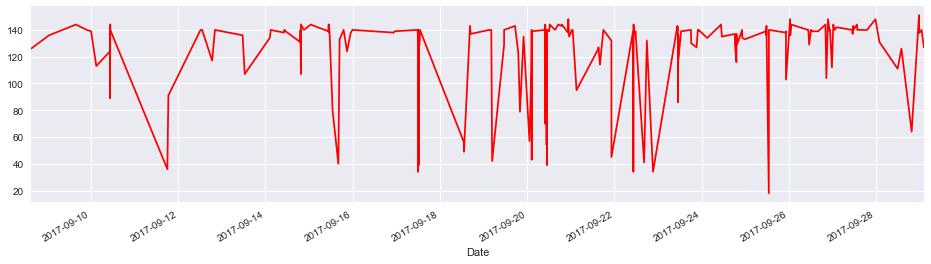

In [26]:
# Plot tweet lengths against time:
tlen.plot(figsize=(16,4), color='r')

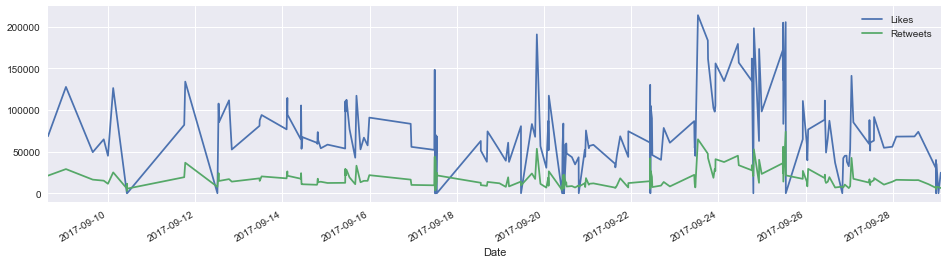

In [27]:
tfav.plot(figsize=(16,4), label='Likes', legend=True)
tret.plot(figsize=(16,4), label='Retweets', legend=True)

### Sources pie chart

In [29]:
# Create pie chart of sources
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
        
# Print the sources list
print("Creation of content sources:")
for source in sources:
    print("* {}". format(source))

Creation of content sources:
* Twitter for iPhone
* Media Studio


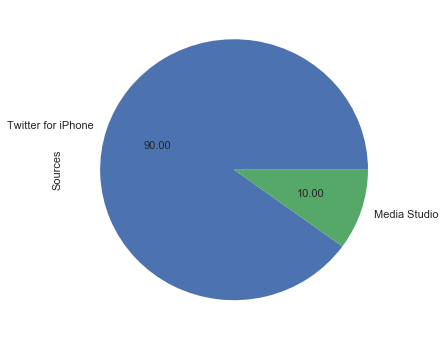

In [31]:
# Create a numpy vector mapped to labels
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Plot pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6,6))

# Sentiment Analysis

### Import textblob

In [36]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyse_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1


In [37]:
# Add sentiment as new column in dataframe
data['SA'] = np.array([analyse_sentiment(tweet) for tweet in data['Tweets']])

# Display the first 10
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,GDP was revised upward to 3.1 for last quarter...,127,913589799411490817,2017-09-29 02:22:36,Twitter for iPhone,24681,6252,1
1,RT @GOPChairwoman: The Trump Inaugural Committ...,140,913570791698173952,2017-09-29 01:07:04,Twitter for iPhone,0,7477,1
2,"Puerto Rico is devastated. Phone system, elect...",138,913554705816711168,2017-09-29 00:03:09,Twitter for iPhone,35152,7679,1
3,RT @billoreilly: Hannity crushing MSNBC at 9. ...,140,913551290717831170,2017-09-28 23:49:35,Twitter for iPhone,0,5103,1
4,RT @IvankaTrump: Thank you to the amazing men ...,140,913550853239443457,2017-09-28 23:47:51,Twitter for iPhone,0,4980,1
5,...really hard to help but many have lost thei...,138,913550237377138688,2017-09-28 23:45:24,Twitter for iPhone,39971,8107,1
6,FEMA &amp; First Responders are doing a GREAT ...,151,913549374227181568,2017-09-28 23:41:58,Twitter for iPhone,30185,6462,1
7,Welcome back @SteveScalise!\n#TeamScalise http...,64,913488283321159680,2017-09-28 19:39:13,Media Studio,48326,10845,1
8,The electric power grid in Puerto Rico is tota...,126,913403237033742336,2017-09-28 14:01:16,Twitter for iPhone,73918,15785,1
9,Democrats don't want massive tax cuts - how do...,111,913371663789625344,2017-09-28 11:55:48,Twitter for iPhone,68280,15709,1


In [38]:
# Construct lists of the classified tweets:

pos_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [42]:
# Print sentiment percentages
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 60.5%
Percentage of neutral tweets: 23.0%
Percentage of negative tweets: 16.5%


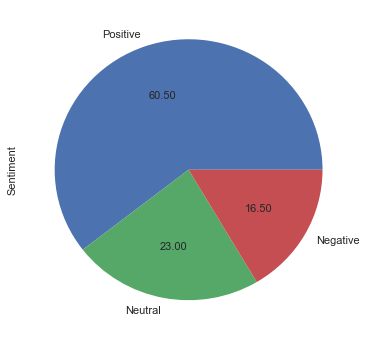

In [45]:
# Display sentiment percentages as pie chart
# Create a numpy vector mapped to labels
sentiment = np.zeros(3)

labels = np.array(["Positive", "Neutral", "Negative"])

sentiment[0] = len(pos_tweets)*100/len(data['Tweets'])
sentiment[1] = len(neu_tweets)*100/len(data['Tweets'])
sentiment[2] = len(neg_tweets)*100/len(data['Tweets'])

sentiment /= 100

# Plot pie chart:
pie_chart = pd.Series(sentiment, index=labels, name='Sentiment')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6,6))